In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import FinanceDataReader as fdr
import yfinance as yf

## **Market Momentum**

In [37]:
start = '2000-01-01'
end = '2024-03-13'

In [40]:
# Import KOSPI data.

kospi = yf.Ticker('005930.KS')
kospi = kospi.history(interval='1d',
              start=start,
              end=end,
              actions=True,
              auto_adjust=True)

In [41]:
# Market momentum : KOSPI and its 125-day moving average

def moving_average(prices, days=125):
    """
    Calculate moving average.
    """
    return prices.rolling(window=days).mean()


def market_momentum(prices):
    """
    Calculate market momentum
    """
    return prices - moving_average(prices)

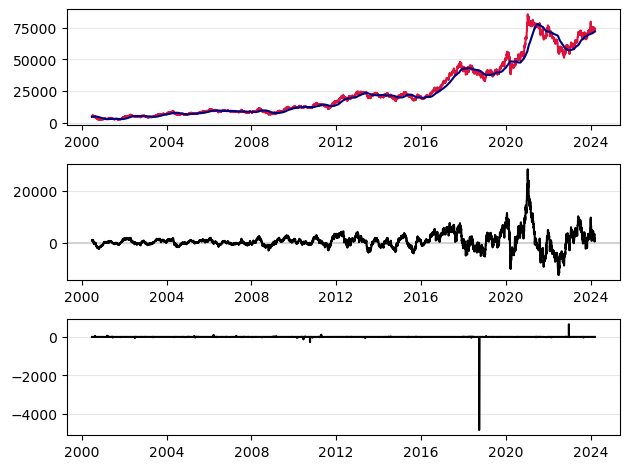

In [81]:
mm = pd.concat([kospi.Close.rename('kospi'), 
                moving_average(kospi.Close).rename('kospi_ma'), 
                market_momentum(kospi.Close).rename('market_momentum')], axis=1)
mm = mm.dropna(axis=0)

# Visualize the data.
start_to_plot = start
end_to_plot = end

fig, ax = plt.subplots(3, 1)

data = mm.loc[start_to_plot:end_to_plot, :]

ax[0].plot(data.kospi, color='crimson')
ax[0].plot(data.kospi_ma, color='navy')

ax[1].axhline(0, color='lightgray')
ax[1].plot(data.market_momentum, color='k')


ax[2].plot(data.market_momentum.pct_change(), color='k') # 


for a in ax:
    a.grid(axis='y', color='lightgray', alpha=0.5)

fig.tight_layout()

In [93]:
# TODO : Amplifying magnitude problem.

period1 = mm.loc['2000-03-02':'2004-03-01'].reset_index()
period2 = mm.loc['2004-03-02':'2008-03-01'].reset_index()
period3 = mm.loc['2008-03-02':'2012-03-01'].reset_index()
period4 = mm.loc['2012-03-02':'2016-03-01'].reset_index()
period5 = mm.loc['2016-03-02':'2020-03-01'].reset_index()
period6 = mm.loc['2020-03-02':'2024-03-01'].reset_index()

def coeffVar(data):
    
    return data.std() / data.mean()

print(coeffVar(period1.market_momentum))
print(coeffVar(period2.market_momentum))
print(coeffVar(period3.market_momentum))
print(coeffVar(period4.market_momentum))
print(coeffVar(period5.market_momentum))
print(coeffVar(period6.market_momentum))

4.9857215021744485
9.658641768636127
2.620671980447079
8.354693452531114
1.5923922751839115
4.365413132007742


## **Stock Price Strength**

## **Stock Price Breadth**

## **Put and Call Options**

## **Market Volatility**

## **Safe Haven Demand**

## **Junk Bond Demand**